In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
# import pandas as pd
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
import glob
import itertools
import time
import zipfile
import gc
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import calendar
import datetime
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
# Basic packages
import numpy as np # linear algebra
# import modin.pandas as pd
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


# settings
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv('drive/My Drive/test/costello_ace_2017-2018.csv')

In [0]:
train_2015 = pd.read_csv('drive/My Drive/costello_ace_2015-2016.csv')

In [0]:
import gc
gc.collect()

4

In [0]:
junk_rows = train[train['Item Type']!=train['Line Item Transaction Type']]
cleaned_df = train.drop(train.index[junk_rows.index])
del train
del junk_rows
cleaned_df['Net Sales'] = cleaned_df['Net Sales'].astype(str).str.replace(',', '').replace('$','').replace('%','').astype(float)
cleaned_df['Gross Margin'] = cleaned_df['Gross Margin'].astype(str).str.replace(',', '').replace('$','').replace('%','').astype(float)
cleaned_df["unique_receipt"] = cleaned_df["Store #"].map(str) + cleaned_df["Receipt Number"].map(str)

In [0]:
gc.collect()

0

# Time Series Model

In [0]:
store = cleaned_df[cleaned_df['Store Name'] == '11116 BELLMORE']

In [0]:
store.reset_index()

,index,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code,unique_receipt
0,19,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,52427600301,4595559,GORILLA TAPE TOUGH&WIDE,1,17.99,10.8,7.19,39.97%,46,HEATING & COOLING SUPPLIES,453,DUCT TAPE,45301,ALL DUCT TAPE,1,NaN,NaN,0,17.99,17.99,$0.00,Y,Bankcard Tender,0,11783,3214,1.91438e+09,MARIAN P,Sale,1,Sale,Retail,NaN,6F50868
1,20,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,82901228387,11168,DROPCLOTH 9'X12' 3MIL,1,8.99,2.38,6.61,73.53%,14,PAINT & PAINT SUPPLIES,139,DROP CLOTHS,13901,PLASTIC,1,NaN,NaN,0,8.99,8.99,$0.00,Y,Bankcard Tender,0,11783,3214,1.91438e+09,MARIAN P,Sale,2,Sale,Retail,NaN,6F50868
2,21,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,8.52808E+11,6406391,"FLEX TAPE BLACK 4""X5'",1,13.99,8.86,5.13,36.67%,64,HOUSEWARES & GIFTS,697,AS SEEN ON TV PRODUCTS,69701,AS SEEN ON TV PRODUCTS,1,NaN,NaN,0,13.99,13.99,$0.00,Y,Bankcard Tender,0,11783,3214,1.91438e+09,MARIAN P,Sale,3,Sale,Retail,NaN,6F50868
3,22,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,80050186,HH50162,$5 REWARDC,-1,-5.00,0,-5.00,100.00%,H2,IN STORE COUPONS,HH3,REWARDS CARD,NaN,BLANK,1,NaN,*,0,5,5,$0.00,Y,Bankcard Tender,0,11783,3214,1.91438e+09,MARIAN P,Return,4,Return,Retail,NaN,6F50868
4,23,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,AUTO,9269862,CMN Donations,1,0.93,0.47,0.46,49.46%,DO,DONTATIONS,DON,DONATIONS,NaN,BLANK,4,NaN,*,0,0.93,0,$0.93,N,Bankcard Tender,-0.93,11783,3214,1.91438e+09,MARIAN P,Sale,5,Sale,Manual Override,NaN,6F50868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198523,17327982,9/30/2018,18:06:51,*5,J60361,6,11116 BELLMORE,AUTO,9269862,CMN Donations,1,1.00,0.5,0.50,50.00%,DO,DONTATIONS,DON,DONATIONS,NaN,BLANK,4,NaN,*,0,1,0,$1.00,N,Cash Tender,-1,NaN,NaN,NaN,ANTHONY KATERIDGE,Sale,3,Sale,Manual Override,NaN,6J60361
1198524,17327983,9/30/2018,18:07:23,*5,J60362,6,11116 BELLMORE,OTHER,56,FASTENERS,1,0.69,0.28,0.41,59.42%,56,FASTENERS,HIL,"HILLMAN GROUP, INC.",NaN,BLANK,5,NaN,NaN,0,0.69,0,$0.69,Y,Cash Tender,-0.69,NaN,NaN,NaN,ROSS JONES,Sale,1,Sale,Manual Override,NaN,6J60362
1198525,17328009,9/30/2018,18:10:59,*5,J60363,6,11116 BELLMORE,27426428515,1205244,FILLR WOOD STNABLE 1OZ,1,7.49,2.57,4.92,65.69%,14,PAINT & PAINT SUPPLIES,156,WOOD FILLER/PUTTY/STICKS,15601,WOOD FILLER,1,NaN,NaN,0,7.49,7.49,$0.00,Y,Bankcard Tender,0,NaN,NaN,NaN,ELIZABETH GARDNER,Sale,1,Sale,Retail,NaN,6J60363
1198526,17328010,9/30/2018,18:10:59,*5,J60363,6,11116 BELLMORE,70798122406,19268,PUTTY PAINTRS 1/2PT DAP,1,5.99,2.25,3.74,62.44%,14,PAINT & PAINT SUPPLIES,146,WALL REPAIR MATERIALS,14601,WALL REPAIR COMPOUNDS,1,NaN,NaN,0,5.99,5.99,$0.00,Y,Bankcard Tender,0,NaN,NaN,NaN,ELIZABETH GARDNER,Sale,2,Sale,Retail,NaN,6J60363


In [0]:
store.head()

,Date,Transaction Time,Customer Number,Receipt Number,Store #,Store Name,Scanned UPC,Item Number,Item Description,Net Sales Units,Net Sales,Cost,Gross Margin,Gross Margin %,Department Code,Department Name,Class Code,Class Name,Fineline Code,Fineline Name,Item was Scanned,MIP Promo ID,Promo/Discount,Dynamic Promo ID,Actual Price,Retail Price,Actual-Retail,Taxable,Tender Type,$ Off Retail,Zip Code,Zip Plus-4,Loyalty ID,Clerk,Item Type,Line #,Line Item Transaction Type,Pricing Source,Return Code,unique_receipt
19,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,52427600301,4595559,GORILLA TAPE TOUGH&WIDE,1,17.99,10.8,7.19,39.97%,46,HEATING & COOLING SUPPLIES,453,DUCT TAPE,45301,ALL DUCT TAPE,1,NaN,NaN,0,17.99,17.99,$0.00,Y,Bankcard Tender,0,11783,3214,1.91438e+09,MARIAN P,Sale,1,Sale,Retail,NaN,6F50868
20,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,82901228387,11168,DROPCLOTH 9'X12' 3MIL,1,8.99,2.38,6.61,73.53%,14,PAINT & PAINT SUPPLIES,139,DROP CLOTHS,13901,PLASTIC,1,NaN,NaN,0,8.99,8.99,$0.00,Y,Bankcard Tender,0,11783,3214,1.91438e+09,MARIAN P,Sale,2,Sale,Retail,NaN,6F50868
21,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,8.52808E+11,6406391,"FLEX TAPE BLACK 4""X5'",1,13.99,8.86,5.13,36.67%,64,HOUSEWARES & GIFTS,697,AS SEEN ON TV PRODUCTS,69701,AS SEEN ON TV PRODUCTS,1,NaN,NaN,0,13.99,13.99,$0.00,Y,Bankcard Tender,0,11783,3214,1.91438e+09,MARIAN P,Sale,3,Sale,Retail,NaN,6F50868
22,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,80050186,HH50162,$5 REWARDC,-1,-5.00,0,-5.00,100.00%,H2,IN STORE COUPONS,HH3,REWARDS CARD,NaN,BLANK,1,NaN,*,0,5,5,$0.00,Y,Bankcard Tender,0,11783,3214,1.91438e+09,MARIAN P,Return,4,Return,Retail,NaN,6F50868
23,4/1/2017,7:37:39,104609,F50868,6,11116 BELLMORE,AUTO,9269862,CMN Donations,1,0.93,0.47,0.46,49.46%,DO,DONTATIONS,DON,DONATIONS,NaN,BLANK,4,NaN,*,0,0.93,0,$0.93,N,Bankcard Tender,-0.93,11783,3214,1.91438e+09,MARIAN P,Sale,5,Sale,Manual Override,NaN,6F50868


In [0]:
dateSales = store[['Date', 'Net Sales']]

In [0]:
dateSales['datetime'] = pd.to_datetime(dateSales['Date'])

In [0]:
dateSales = dateSales.set_index('datetime')
dateSales.drop(['Date'], axis=1, inplace=True)

In [0]:
dateSales.head()

,Net Sales
datetime,
2017-04-01,17.99
2017-04-01,8.99
2017-04-01,13.99
2017-04-01,-5.00
2017-04-01,0.93


In [0]:
sales_agg = pd.DataFrame(dateSales.groupby('datetime').sum()['Net Sales'])

In [0]:
sales_agg.to_pickle('./salesagg.pk')

In [0]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [0]:
test_index = sales_agg[sales_agg['Net Sales']<=0].index

In [0]:
sales_agg.drop(test_index, inplace=True)

In [0]:
sales_agg_2 = pd.DataFrame(sales_agg)

In [0]:
sales_agg_2['Net Sales'] = np.log(sales_agg_2['Net Sales'])

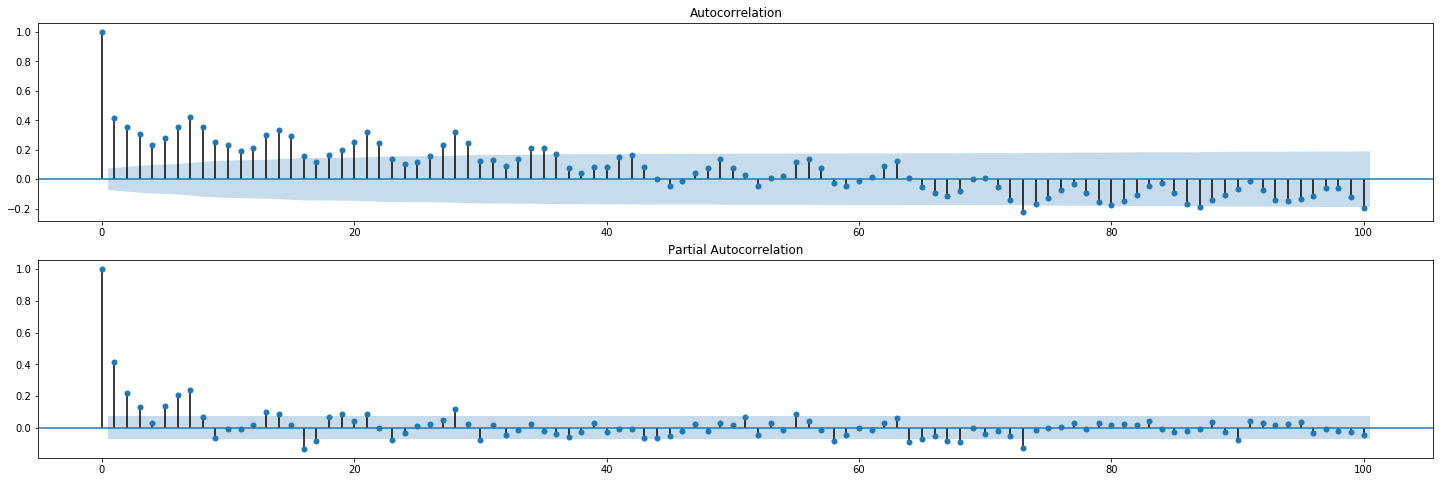

In [0]:
fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_agg_2['Net Sales'][:-29], lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_agg_2['Net Sales'][:-29], lags=100, ax=ax2)

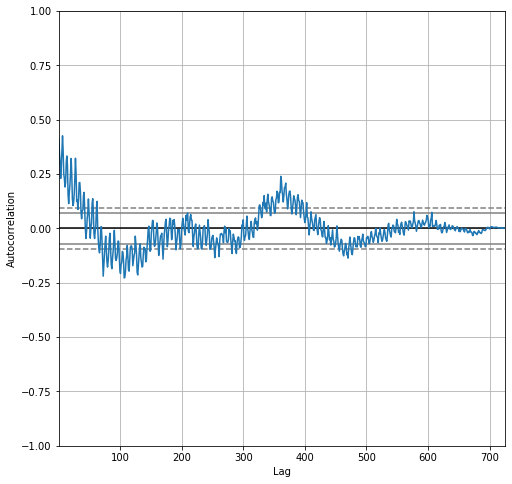

In [0]:
from pandas.plotting import autocorrelation_plot
plt.rcParams["figure.figsize"] = [8,8]
autocorrelation_plot(sales_agg_2['Net Sales'])
plt.show()

In [0]:
train = sales_agg_2[sales_agg_2.index < pd.to_datetime('2018-07-01')]

In [0]:
test = sales_agg_2[sales_agg_2.index >= pd.to_datetime('2018-07-01')]

In [0]:
X = sales_agg_2['Net Sales']
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]

In [0]:
len(train)

652

In [0]:
len(test)

73

In [0]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(endog = sales_agg_2, order=(10,1,1),seasonal_order=(0,1,0,365),trend='c',enforce_invertibility=False)  
fitted = model.fit(disp=-1)  

In [0]:
print(fitted.summary())

                                  Statespace Model Results                                 
Dep. Variable:                           Net Sales   No. Observations:                  652
Model:             SARIMAX(10, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -519.250
Date:                             Mon, 02 Dec 2019   AIC                           1062.500
Time:                                     02:41:47   BIC                           1116.019
Sample:                                          0   HQIC                          1083.274
                                             - 652                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.022      0.028      0.978      -0.043       0.044
ar.L1         -0.7548      

In [0]:
pred = fitted.get_prediction(start = pd.to_datetime('2018-07-01'))

In [0]:
sales_agg_2.tail(5)

,Net Sales
datetime,
2018-12-27,9.506841
2018-12-28,9.150533
2018-12-29,9.513354
2018-12-30,9.382899
2018-12-31,9.309701


In [0]:
from dateutil.relativedelta import *
start = datetime.datetime.strptime("2019-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(day=x) for x in range(1,30)]

In [0]:
len(date_list)

29

In [0]:
future = pd.DataFrame(index=date_list, columns= sales_agg_2.columns)

In [0]:
sales_agg_2 = pd.concat([sales_agg_2, future])

In [0]:
sales_agg_2.tail(45)

In [0]:
x =  fitted.predict(start = 725, end = 753, dynamic=True)

In [0]:
sales_agg_2['Net Sales Pred'] = np.nan

In [0]:
sales_agg_2['Net Sales Pred'].values[-29:] = fitted.predict(start = 725, end=753, dynamic=True).values

In [0]:
sales_agg_2.head(40)

,Net Sales,Net Sales Pred
2017-01-01,9.345960,NaN
2017-01-02,10.005408,NaN
2017-01-03,9.130885,NaN
2017-01-04,9.389909,NaN
2017-01-05,9.385211,NaN
2017-01-06,9.388384,NaN
2017-01-07,9.738582,NaN
2017-01-08,9.676492,NaN
2017-01-09,9.445013,NaN
2017-01-10,9.144830,NaN


In [0]:
sales_agg_2.tail(40)

,Net Sales,Net Sales Pred
2018-12-20,9.559108,NaN
2018-12-21,9.449486,NaN
2018-12-22,10.073321,NaN
2018-12-23,9.845928,NaN
2018-12-24,9.635809,NaN
2018-12-26,9.335631,NaN
2018-12-27,9.506841,NaN
2018-12-28,9.150533,NaN
2018-12-29,9.513354,NaN
2018-12-30,9.382899,NaN


In [0]:
pred_ci = pred.conf_int()

In [0]:
fc, se, conf = fitted.forecast(73, alpha=0.05)

ValueError: ignored

In [0]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [0]:
pred.predicted_mean

datetime
2018-07-01    9.805827
2018-07-02    9.960176
2018-07-03    9.746399
2018-07-04    9.793494
2018-07-05    9.865534
                ...   
2018-12-27    9.345068
2018-12-28    9.709950
2018-12-29    9.278822
2018-12-30    9.428289
2018-12-31    9.579916
Length: 182, dtype: float64

In [0]:
from sklearn.metrics import r2_score
r2_score(test['Net Sales'], preds)

-0.7056330107592603

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test['Net Sales'][:-29], pred.predicted_mean)

0.2025686832215303

In [0]:
test['Net Sales'][:-29]

2018-07-01    10.260148
2018-07-02    10.161354
2018-07-03    10.070232
2018-07-04    10.078791
2018-07-05     9.916217
                ...    
2018-12-27     9.506841
2018-12-28     9.150533
2018-12-29     9.513354
2018-12-30     9.382899
2018-12-31     9.309701
Name: Net Sales, Length: 182, dtype: float64

In [0]:
pred.predicted_mean

datetime
2018-07-01    9.805827
2018-07-02    9.960176
2018-07-03    9.746399
2018-07-04    9.793494
2018-07-05    9.865534
                ...   
2018-12-27    9.345068
2018-12-28    9.709950
2018-12-29    9.278822
2018-12-30    9.428289
2018-12-31    9.579916
Length: 182, dtype: float64

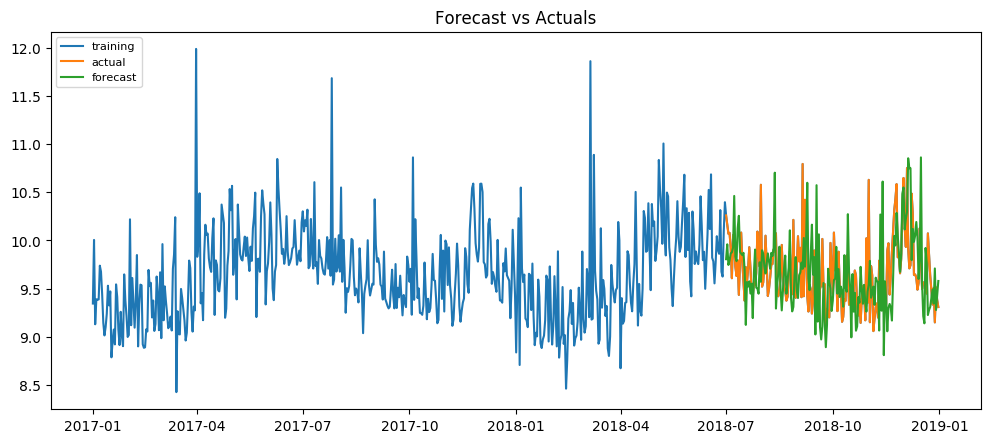

In [0]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(sales_agg_2['Net Sales'], label='training')
plt.plot(test['Net Sales'], label='actual')
plt.plot(pred.predicted_mean, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
% pip install apyori


  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=ca2ff1ffb8fd929d9fd455e1f3771fe3b035cd538f2cea3c5e84222ed7b56d6c
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [0]:
cleaned_df_1 = cleaned_df[cleaned_df['Store Name'].isin(['14252 ISLAND PARK', '11116 BELLMORE'])]

In [0]:
import pickle
cleaned_df_1.to_pickle("./finalNew.pkl")

In [0]:
cleaned_df_new = cleaned_df[~cleaned_df['Item Description'].str.contains("INST SAVINGS")]

In [0]:
cleaned_df_new =cleaned_df

In [0]:
gc.collect()

0

In [0]:
order_items_coupon = cleaned_df_new.groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='all products')

In [0]:
order_items = cleaned_df_new.groupby(['Receipt Number'])['Item Description'].apply(list).reset_index(name='all products')

In [0]:
order_items_coupon.to_pickle('./orderItemsCoupon.pkl')

In [0]:
order_items.to_pickle("./orderItems.pkl")

In [0]:
selected_data = cleaned_df[['unique_receipt', 'Item Number', 'Receipt Number']]
order_items_prod = selected_data.groupby(['unique_receipt'])['Item Number'].apply(list).reset_index(name='all products')

In [0]:
selected_data = cleaned_df[['unique_receipt', 'Item Number', 'Receipt Number']]
order_items_prod2 = selected_data.groupby(['Receipt Number'])['Item Number'].apply(list).reset_index(name='all products')

In [0]:
selected_data2 = cleaned_df[['unique_receipt', 'Department Code']]
order_items_dept = selected_data2.groupby(['unique_receipt'])['Department Code'].apply(list).reset_index(name='all products')

In [0]:
selected_data3 = cleaned_df[['unique_receipt', 'Item Number', 'Customer Number']]
order_items_cust = selected_data3.groupby(['unique_receipt'])['Item Number'].apply(list).reset_index(name='all products')
order_items_cust2 = selected_data3.groupby(['unique_receipt'])['Customer Number'].apply(list).reset_index(name='all products')

In [0]:
order_items_cust2.head()


In [0]:
print(len(cleaned_df))

17328020


In [0]:
import gc
gc.collect()

0

In [0]:
# Play an audio beep. Any audio URL will do.
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [0]:
from apyori import apriori

In [0]:
transaction_items

In [0]:
results = list(apriori(transaction_items, min_length=2, min_lift = 0))

In [0]:
results2 = list(apriori(transaction_items2))

In [0]:
print(results)

[]


In [0]:
print(results2)

[]


In [0]:
pickle.dump(results, open('results_1.pkl', 'wb'))

In [0]:
pickle.dump(results2, open('results_2.pkl', 'wb'))

In [0]:
import pickle

results = pickle.load(open('results_1.pkl', 'rb'))
results2 = pickle.load(open('results_2.pkl', 'rb'))
association_results = pickle.load(open('results_3.pkl', 'rb'))

In [0]:
order_items.head()

,unique_receipt,all products
0,634976,"[SCOTT BATH TISS1000SHEET, STANLEY STAPLE/BRAD..."
1,634978,[MKTG RENTAL SPACE]
2,634979,[MKTG RENTAL SPACE]
3,634980,[MKTG RENTAL SPACE]
4,634981,"[ES PAR38 HALGN BULB 86W, HALOGN BULB ES PAR38..."


In [0]:
order_items_coupon['all products'][3]

['CM WET DRY VAC 6 GAL',
 '2381556 $20 INST SAVINGS',
 'CM WET DRY VAC 6 GAL',
 '2381556 $20 INST SAVINGS',
 'DGTL IN/OUT THERM  ASST',
 'DGTL IN/OUT THERM  ASST']

In [0]:
order_items.head()

,Receipt Number,all products
0,1,"[BATTERY- ALKLINE AAA 4PK, HOLE SAW 1-3/4"" ICE..."
1,10,"[WASTEBASKET 36QT WHITE, PAINTSHIELD 10"" ALUM]"
2,100,"[STRAP EMT 1HOLE 1"", CONDUIT EMT 1""X10', PROTE..."
3,1000,"[CM WET DRY VAC 6 GAL, CM WET DRY VAC 6 GAL, D..."
4,10000,"[PLUG SCH40 PVC 1/2"" MPT, CAP PVC SCH40 1/2""FP..."


In [0]:
order_items_coupon['all products'][6]

['SUPERHIDE ZERO EGGS-BASE 2 GAL',
 'GASKET TOILET NO-SEEP #3',
 'FLOAT TOILET PLSTC 4X5"']

In [0]:
transaction_items = order_items_coupon['all products'].tolist()

In [0]:
transaction_items

In [0]:
association_rules = apriori(transaction_items, min_length=3, min_support=0.00045)
association_results = list(association_rules)

In [0]:
association_results

[RelationRecord(items=frozenset({'#16 DECK MOP W/HANDLE'}), support=0.00048079717227860874, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'#16 DECK MOP W/HANDLE'}), confidence=0.00048079717227860874, lift=1.0)]),
 RelationRecord(items=frozenset({'#300000947-WRTH HNGR GRN'}), support=0.0005540111843838286, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'#300000947-WRTH HNGR GRN'}), confidence=0.0005540111843838286, lift=1.0)]),
 RelationRecord(items=frozenset({'#40 TOP SOIL'}), support=0.003646359716291929, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'#40 TOP SOIL'}), confidence=0.003646359716291929, lift=1.0)]),
 RelationRecord(items=frozenset({'$10 OF $30'}), support=0.0007298757701623464, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'$10 OF $30'}), confidence=0.0007298757701623464, lift=1.0)]),
 RelationRecord(items=frozenset({'$10 OFF $20 

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
association_rules2 = apriori(transaction_items2, min_support=0.0045, min_confidence=0.2, min_lift=1, min_length=2)
association_results2 = list(association_rules2)

In [0]:
pickle.dump(association_results, open('results_3.pkl', 'wb'))

In [0]:
print(association_results[1])

In [0]:
print(association_results[4])

In [0]:
!fusermount -u drive
!google-drive-ocamlfuse drive

/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
test = pickle.load(open('drive/My Drive/Colab Notebooks/test.pkl','rb'))

In [0]:
print(results[1])

In [0]:
for item in association_results:

    if (str(item[2][0][3]) =='1.0'):
      continue
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] )
    if len(items) > 1:
      print("other" + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third indtrex of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")


Rule: BATTERY ALK AA 16WIDE
other3166659 $2 INST SAVINGS
Support: 0.0005138872622157495
Confidence: 1.0
Lift: 833.2913719943423
Rule: TOTE 18 GAL CLR/BLK
other6250617 $1 INST SAVINGS
Support: 0.0004655114175480406
Confidence: 1.0
Lift: 1645.6340782122907
Rule: LIQUID ANT BAIT 6PK
other7105786 $3 INST SAVINGS
Support: 0.0005598584596338939
Confidence: 1.0
Lift: 351.513723150358
Rule: CUTTER BUG FREE 32 OZ
other7130057 $2 INST SAVINGS
Support: 0.0007624146279501486
Confidence: 1.0
Lift: 567.5238018784619
Rule: 7206436 $7 INST SAVINGS
otherEZ SEED SUN&SHADE 10#
Support: 0.0008984893723078559
Confidence: 1.0
Lift: 786.0400266844563
Rule: FERTILIZR 4STEP PRGM 5M
other7287154 $20 INST SAVINGS
Support: 0.0013365595212432196
Confidence: 1.0
Lift: 730.7125581395348
Rule: POT SOIL MOIST CONT 2 CF
other7301609 $3 INST SAVINGS
Support: 0.0015334576960310874
Confidence: 1.0
Lift: 483.3283653517468
Rule: MG SOIL VEG&HERB 1.5CF
other7438286 $2 INST SAVINGS
Support: 0.0006123363496096833
Confidence: 1